<a href="https://colab.research.google.com/github/Marcelo0479/letscode/blob/main/Projeto_final_lets_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests as r

In [2]:
url =  'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [3]:
resp.status_code

200

In [4]:
raw_data= resp.json()

In [5]:
raw_data[0]

{'Active': 1,
 'City': '',
 'CityCode': '',
 'Confirmed': 1,
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Date': '2020-02-26T00:00:00Z',
 'Deaths': 0,
 'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Province': '',
 'Recovered': 0}

In [14]:
final_data = []
for obs in raw_data:
  final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [15]:
final_data.insert(0 , ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])


In [16]:
final_data[0:10]

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z']]

In [17]:
CONF = 0
OBT = 1
REC = 2
ATI = 3
DAT = 4

In [19]:
for i in range(1, len(final_data)):
  final_data[i][DAT] = final_data[i][DAT][:10]

In [20]:
final_data[0:10]

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05']]

In [21]:
import datetime as dt

In [22]:
import csv

In [23]:
with open('brasil-covid.csv', 'w') as file:
  writer = csv.writer(file)
  writer.writerows(final_data)

In [24]:
for i in range(1, len(final_data)):
  final_data[i][DAT] = dt.datetime.strptime(final_data[i][DAT], '%Y-%m-%d')

In [26]:
final_data[0:10]

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)]]

In [27]:
def get_datasets(y, labels):
  if type(y[0]) == list:
    datasets = []
    for i in range(len(y)):
      datasets.append({'label': labels[i], 'data': y[i]})
    return datasets
  else:
    return [{'label': labels[0], 'data': y}]

In [28]:
def set_title(title = ''):
  if title != '':
    display = 'true'
  else:
    display = 'false'
  return {'title': title, 'display': display}

In [30]:
def create_char(x, y, labels, kind='bar', title=''):
  datasets= get_datasets(y, labels)
  options = set_title(title)
  chart = {'type': kind, 'data': {'labels': x, 'datasets': datasets}, 'options': options}
  return chart

In [31]:
def get_api_chart(chart):
  url_base = 'https://quickchart.io/chart'
  resp = r.get(f'{url_base}?c={str(chart)}')
  return resp.content

In [32]:
def save_image(path, content):
  with open(path, 'wb') as image:
    image.write(content)

In [34]:
from PIL import Image
from IPython.display import display

In [38]:
def display_image(path):
  img_pil = Image.open(path)
  display(img_pil)

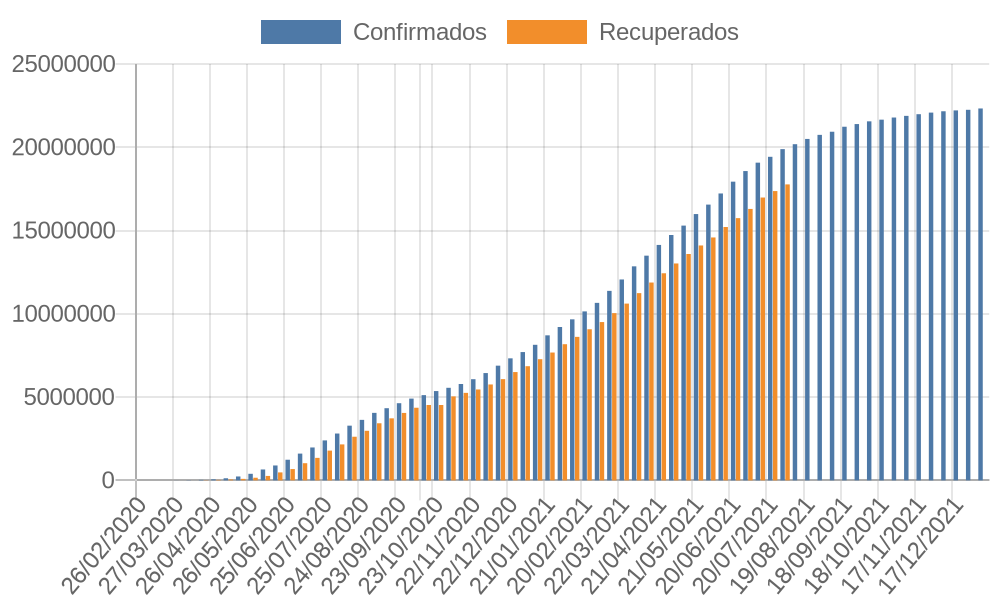

In [39]:
y_data_1 = []
for obs in final_data[1::10]:
  y_data_1.append(obs[CONF])

y_data_2 = []
for obs in final_data[1::10]:
  y_data_2.append(obs[REC])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::10]:
  x.append(obs[DAT].strftime('%d/%m/%Y'))

chart = create_char(x, [y_data_1, y_data_2], labels, title='Gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

In [40]:
from urllib.parse import quote

In [41]:
def get_api_qrcode(link):
  text = quote(link)
  url_base = 'https://quickchart.io/qr'
  resp = r.get(f'{url_base}?text={text}')
  return resp.content

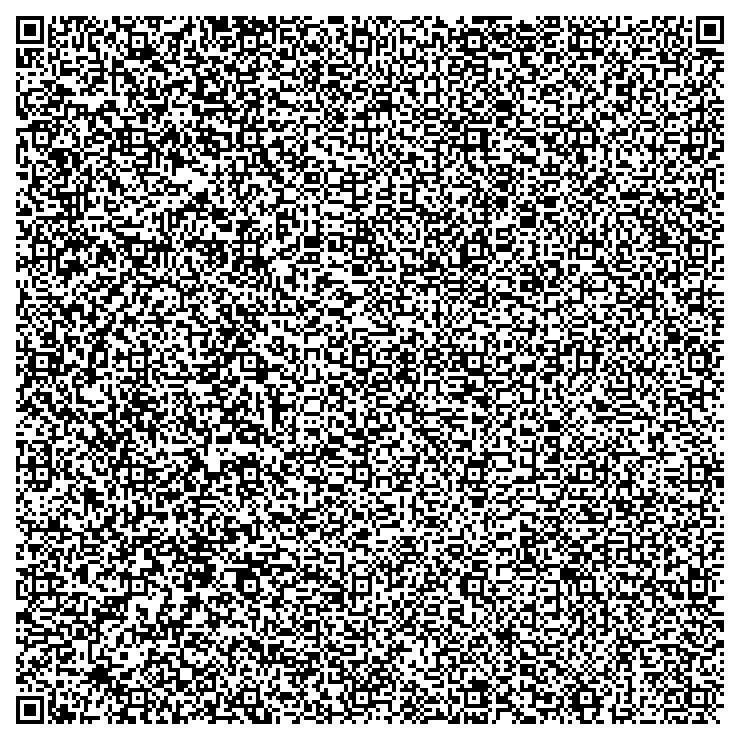

In [42]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')